# Preparing data for CNN


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from keras import backend as k
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Dense,Flatten
from keras.layers import Activation
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = r"C:\Users\arnav\Desktop\cats-and-dogs-CNN-classifier\train"
validate_path = r"C:\Users\arnav\Desktop\cats-and-dogs-CNN-classifier\validate"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)
validate_batches = ImageDataGenerator().flow_from_directory(validate_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
#credits: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
import sys
from PIL import Image

In [6]:
images , labels = next(train_batches)

C:\Users\arnav\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


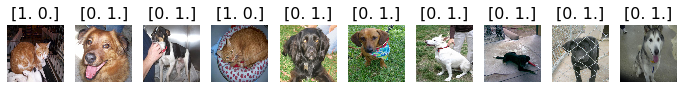

In [7]:
plots(images,titles=labels)

# Training CNN Model


In [8]:
model = Sequential([
        Conv2D(16, (3,3), activation = "relu", input_shape=(224,224,3)),
        Dense(8, activation="relu"),
        Dense(8, activation="relu"),
        Flatten(),
        Dense(2, activation="softmax")
])

In [9]:
model.compile(optimizer="Adam" , loss="categorical_crossentropy" , metrics = ["accuracy"])

In [17]:
model.fit_generator(train_batches , steps_per_epoch=100 , validation_data=validate_batches , 
                    validation_steps= 50 , epochs= 5 , verbose=2)

Epoch 1/5
 - 26s - loss: 0.6973 - accuracy: 0.9210 - val_loss: 5.3691 - val_accuracy: 0.5400
Epoch 2/5
 - 25s - loss: 0.3442 - accuracy: 0.9230 - val_loss: 1.2970 - val_accuracy: 0.5660
Epoch 3/5
 - 26s - loss: 0.0629 - accuracy: 0.9890 - val_loss: 1.2295 - val_accuracy: 0.5580
Epoch 4/5
 - 26s - loss: 0.0587 - accuracy: 0.9880 - val_loss: 0.7278 - val_accuracy: 0.5400
Epoch 5/5
 - 26s - loss: 0.0507 - accuracy: 0.9940 - val_loss: 3.1395 - val_accuracy: 0.5280


# testing model


In [11]:
test_path = r"C:\Users\arnav\Desktop\cats-and-dogs-CNN-classifier\test"
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)

Found 1000 images belonging to 2 classes.


In [12]:
test_images,test_labels = next(test_batches)

C:\Users\arnav\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


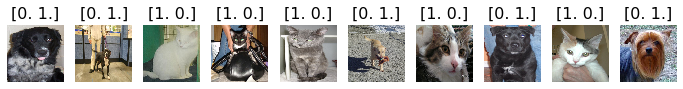

In [13]:
plots(test_images,titles=test_labels)

In [14]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 0.], dtype=float32)

In [15]:
predictions = model.predict_generator(test_batches , steps=100 , verbose = 0)

In [16]:
predictions

array([[2.9195316e-02, 9.7080469e-01],
       [8.9969987e-09, 1.0000000e+00],
       [8.5410923e-01, 1.4589074e-01],
       ...,
       [4.3623973e-02, 9.5637608e-01],
       [5.3886010e-04, 9.9946111e-01],
       [7.9355979e-01, 2.0644017e-01]], dtype=float32)